1. Adatok beolvasása (Pandas)

A train.txt fájlban vannak a megfigyelések. A read_csv függvényt használjuk:

In [4]:
import pandas as pd

# Beolvasás (feltételezve, hogy 'train.txt' a munkakönyvtárban van)
data_train = pd.read_csv("data/lab1-alldata/Train set.txt", sep=";")

# Első pár sor megtekintése
print(data_train.head())


     X         Y
0  0.1  0.398093
1  0.2  0.848102
2  0.3  0.747736
3  0.4  0.750563
4  0.5 -0.063083


2. Adatok vizualizálása (Matplotlib scatter plot)

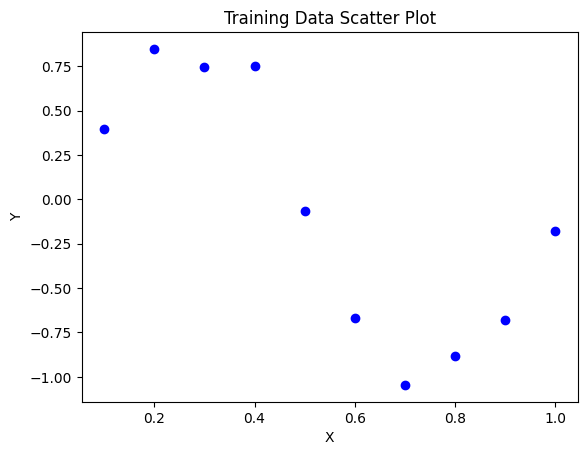

In [5]:
import matplotlib.pyplot as plt

plt.plot(data_train.X, data_train.Y, 'bo')  # 'bo' = blue circle markers
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data Scatter Plot")
plt.show()


Összefoglalva

train.txt → 10 adatpont X és Y értékekkel (Y = f(X)+zaj)

Scatter plot → vizualizáljuk az adatokat

Cél → látni a mintázatot, segít a modell kiválasztásában (lineáris, polinomiális, stb.)

Miért? → elősegíti a bias-variance tradeoff megértését: egyszerű modell = alulillesztés, bonyolult = túlillesztés





/


/

1. Polinomiális illesztés alapja

A célunk az, hogy az adatokhoz (X, Y) találjunk egy polinomiális függvényt:

Y = b0 + b1*X + b2*X^2 + ... + bp*X^p + e


p → a polinom fokszáma, ami a modell komplexitását adja.

e ~ N(0, s^2) → zaj a mérésben, azaz Y nem pontosan a függvény értéke.

A feladat: megtalálni a b0, b1, …, bp együtthatókat úgy, hogy a modell a lehető legjobban illeszkedjen az adatokra.

In [5]:
import numpy as np

# Példa p=2
# ======================================================
# 4. POLINOMIÁLIS ILLESZTÉS - PÉLDA p=2
# ======================================================

# np.polyfit(X, Y, deg=2, full=True) 
# Ez a függvény a tanuló adatokra illeszt egy 2. fokú polinomot.
# deg=2 → másodfokú polinomot keresünk, azaz a modell:
#     Y_hat = β0 + β1*X + β2*X^2
# full=True → nem csak a polinom együtthatóit adja vissza, hanem 
#     a modell illeszkedésének statisztikáit is, például a hiba nagyságát (RSS)

fit = np.polyfit(data_train.X, data_train.Y, deg=2, full=True)

# fit[0] → a polinom együtthatói tömbben
# [β2, β1, β0], vagyis a legmagasabb fokú kitevő elsőként szerepel
coeffs = fit[0]

# fit[1][0] → Residual Sum of Squares (RSS)
# Ez az összegzett négyzetes hiba a tanuló adatokon:
# RSS = Σ (Y_i - Y_hat_i)^2
rss = fit[1][0]

# Kiírjuk az eredményeket
print("2. fokú polinom együtthatói:", coeffs)
print("Residual Sum of Squares (RSS):", rss)



2. fokú polinom együtthatói: [ 2.127715   -4.15868198  1.39108041]
Residual Sum of Squares (RSS): 1.788790322211725


Mit csináltunk eddig?

Megkerestük a 2. fokú polinom legjobb együtthatóit, amelyek minimalizálják a tanuló adatokhoz viszonyított négyzetes hibát.

Megkaptuk a polinom együtthatóit (coeffs) → ez határozza meg a görbe alakját.

Megkaptuk a RSS értéket, ami mutatja, mennyire illeszkedik a polinom a pontokra.

In [6]:
# ======================================================
# 5. FITTED VALUES SZÁMÍTÁSA
# ======================================================

# np.polyval(coeffs, X_train)
# Ez kiszámítja a polinom által becsült Y értékeket minden X_train ponton
Y_hat = np.polyval(coeffs, data_train.X)

# Kiírjuk a becsült Y értékeket
print("Fitted values (Y_hat):", Y_hat)


Fitted values (Y_hat): [ 0.99648936  0.64445261  0.33497016  0.06804201 -0.15633183 -0.33815138
 -0.47741663 -0.57412758 -0.62828423 -0.63988658]


Magyarázat:

Y_hat → a polinom által becsült Y értékek minden tanuló X ponton.

Ezek az értékek azt mutatják, hogy a polinom hogyan közelíti a tanuló adatokat.

Ha az illesztés tökéletes lenne, Y_hat = Y_train. De van zaj, így lesznek kisebb eltérések.

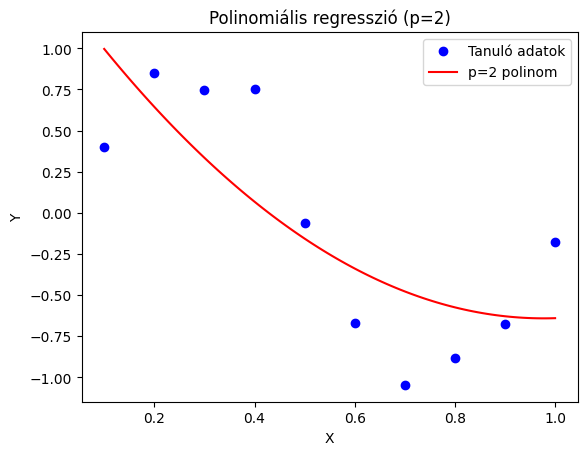

In [7]:
# ======================================================
# 6. POLINOMIÁLIS GÖRBE ÁBRÁZOLÁSA
# ======================================================

# x_plot → sima X értékek tömbje a görbéhez
# linspace(start, stop, num) → num darab egyenletesen elosztott pont a start és stop között
x_plot = np.linspace(min(data_train.X), max(data_train.X), 100)

# y_plot → a polinom kiértékelése az x_plot pontokon
y_plot = np.polyval(coeffs, x_plot)

# Rajzoljuk a scatter plotot (tanuló adatok) és a polinom görbét
plt.plot(data_train.X, data_train.Y, 'bo', label='Tanuló adatok')  # kék pontok
plt.plot(x_plot, y_plot, 'r-', label='p=2 polinom')      # piros görbe
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polinomiális regresszió (p=2)")
plt.legend()
plt.show()


Mit látunk az ábrán?

Kék pontok → valós adatok

Piros görbe → 2. fokú polinom, ami a lehető legjobban illeszkedik a pontokra

A görbe trendet mutat → követi a pontok általános irányát, de nem minden ponton megy át tökéletesen

In [8]:
# ======================================================
# 7. TRAINING RMSE SZÁMÍTÁSA
# ======================================================

# RMSE = Root Mean Squared Error
# Megmutatja, mennyire pontos a modell a tanuló adatokon
rmse_train = np.sqrt(np.mean((data_train.Y - Y_hat)**2))
print("Training RMSE (p=2):", rmse_train)


Training RMSE (p=2): 0.42294093230754143


Mit csinálunk?

(Y_train - Y_hat) → a pontonkénti eltérés (hiba)

**2 → négyzetre emeljük → minden hiba pozitív

np.mean() → átlag a tanuló pontokon → Mean Squared Error (MSE)

np.sqrt() → gyök → RMSE

RMSE → átlagos hiba nagysága a tanuló adatokon, minél kisebb, annál jobb az illeszkedés

In [9]:
# ======================================================
# 8. TESZT ADATOK BEOLVASÁSA ÉS RMSE SZÁMÍTÁS
# ======================================================

# test.txt betöltése
test_data = pd.read_csv("data/lab1-alldata/test.txt", sep=";")

# Az oszlopnevek pontosak: "X_test" és "Y_test"
X_test = test_data["X_test"].values
Y_test = test_data["Y_test"].values

# Polinom értékelése a teszt adatokon
Y_hat_test = np.polyval(coeffs, X_test)

# Test RMSE számítása
rmse_test = np.sqrt(np.mean((Y_test - Y_hat_test)**2))
print("Test RMSE (p=2):", rmse_test)


Test RMSE (p=2): 0.48897442122388995


Mi történik itt?

Betöltjük az új, ismeretlen pontokat (teszt adatok).

Kiértékeljük a 2. fokú polinomot ezeken a pontokon → Y_hat_test

RMSE számítása → megmutatja, mennyire jól általánosít a modell.

Fontos: a training RMSE mindig kisebb, a test RMSE mutatja, hogy a polinom valóban jól működik-e új adatokon, vagy túlillesztés történt.


///////////Összefoglalás/////////////////
-----

p = 2 → másodfokú polinom

coeffs → a polinom együtthatói (b0, b1, b2)

Y_hat → becsült Y értékek a tanuló adatokon

RSS → négyzetes hiba összege a tanuló pontokon

RMSE → átlagos hiba nagysága (tanuló és teszt adatokon)

Ábra → vizuálisan mutatja, hogy a polinom mennyire követi a pontok trendjét

C:\Users\4iG User\AppData\Local\Temp\ipykernel_9024\821499240.py:19: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(data_train.X, data_train.Y, deg=p)


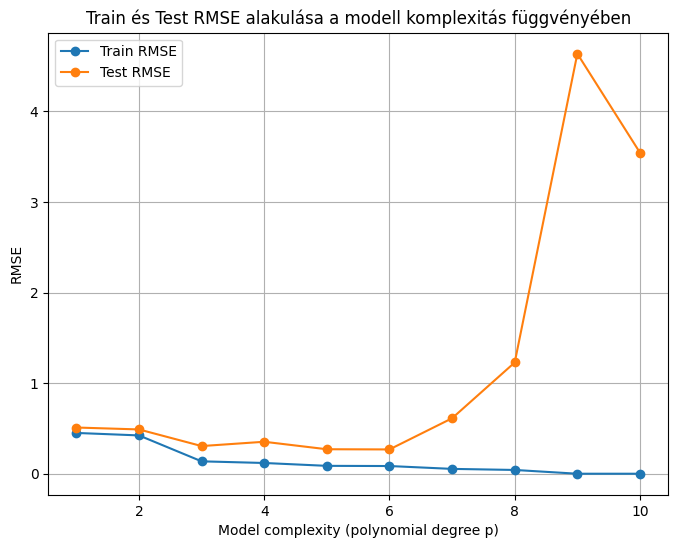

In [10]:
# ======================================================
# 4. FELADAT: Train és Test RMSE ábrázolása a modell komplexitás (p) függvényében
# ======================================================

import matplotlib.pyplot as plt
import numpy as np

# Meghatározzuk, hogy milyen fokszámú polinomokat próbálunk ki
# Például 1-től 10-ig vizsgáljuk a polinomokat
p_values = range(1, 11)

# Létrehozunk két üres listát, ahová a train és test RMSE értékeket fogjuk gyűjteni
train_rmse = []
test_rmse = []

# Végigmegyünk minden p értéken
for p in p_values:
    # 1) Polinom illesztése a train adatokra
    coeffs = np.polyfit(data_train.X, data_train.Y, deg=p)
    
    # 2) Train adatokon előrejelzés
    Y_hat_train = np.polyval(coeffs, data_train.X)
    
    # 3) Train RMSE kiszámítása
    rmse_train = np.sqrt(np.mean((data_train.Y - Y_hat_train)**2))
    
    # 4) Test adatokon előrejelzés
    Y_hat_test = np.polyval(coeffs, X_test)
    
    # 5) Test RMSE kiszámítása
    rmse_test = np.sqrt(np.mean((Y_test - Y_hat_test)**2))
    
    # 6) Eredmények eltárolása a listákba
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

# Most elkészítjük az ábrát
plt.figure(figsize=(8,6))

# Train hibák görbéje
plt.plot(p_values, train_rmse, marker='o', label='Train RMSE')

# Test hibák görbéje
plt.plot(p_values, test_rmse, marker='o', label='Test RMSE')

# Tengelyek feliratai
plt.xlabel("Model complexity (polynomial degree p)")
plt.ylabel("RMSE")

# Ábra címe
plt.title("Train és Test RMSE alakulása a modell komplexitás függvényében")

# Jelmagyarázat
plt.legend()

# Rácsvonalak a könnyebb olvashatóságért
plt.grid(True)

# Ábra megjelenítése
plt.show()

# ======================================================
# Következtetések (magyarázat a látottak alapján):
# - Ha p kicsi (pl. 1–2), a modell túl egyszerű: magas bias, mind a train, mind a test hibák nagyok.
# - Ahogy növeljük p-t, a train hiba csökken, mert a modell egyre jobban illeszkedik.
# - A test hiba először csökken, majd emelkedik: itt jelentkezik a túlilleszkedés (overfitting).
# - Az optimális p ott van, ahol a test hiba a legkisebb.
# ======================================================
